In [174]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
#Cargamos los datos y visualizamos
df = pd.read_csv('DS_Prediccion_de_Cardiopatia_SinDatosPerdidos.csv',sep=';')
df.head(10)

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial,Colesterol,Nivel_Azucar_Ayunas,Res_Electrocardiografico,Frecuencia_Cardiaca,Angina_Inducida,DepresionST,DepresionST_Pendiente,NumeroVasos,Prueba_Tálio,Resultado
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [176]:
df.groupby('Resultado').size()

Resultado
0    495
1    523
dtype: int64

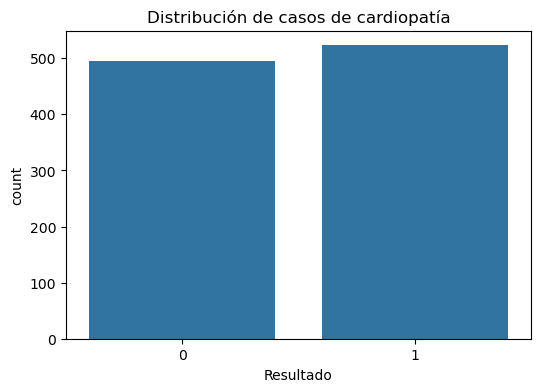

In [177]:
# Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(x='Resultado', data=df)
plt.title('Distribución de casos de cardiopatía')
plt.show()

In [178]:
#Separaramos X e Y
X = df.drop('Resultado', axis=1).values
y = df['Resultado'].values

In [179]:
#Normalizamos los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [180]:
#Separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [181]:
#Creamos el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1ra capa oculta
model.add(Dense(32, activation='relu'))  # 2da capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida (predicción binaria)

C:\Users\keyla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
#Compilamos el modelo MLP
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [183]:
#Entrenamos el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5459 - loss: 0.6921 - val_accuracy: 0.7243 - val_loss: 0.6002
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7744 - loss: 0.5682 - val_accuracy: 0.8037 - val_loss: 0.5033
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8373 - loss: 0.4660 - val_accuracy: 0.8037 - val_loss: 0.4253
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8183 - loss: 0.3986 - val_accuracy: 0.8411 - val_loss: 0.3727
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8100 - loss: 0.3678 - val_accuracy: 0.8505 - val_loss: 0.3433
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8615 - loss: 0.3129 - val_accuracy: 0.8598 - val_loss: 0.3292
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8678 - loss: 0.3025 - val_accuracy: 0.8645 - val_loss: 0.3222
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8568 - loss: 0.2967 - val_accuracy: 0.8645 -

In [184]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convertimos las probabilidades en clases binarias (0 o 1)

# Mostramos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Aquí usamos y_pred, no predicciones
labels = ["No Cardiopatía", "Cardiopatía"]
matriz = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Aquí también usamos y_pred
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# Mostramos el reporte de clasificación
clasificadores = ["No Cardiopatía", "Cardiopatía"]  # Esto ya estaba bien
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=clasificadores))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Matriz de confusión:
                No Cardiopatía  Cardiopatía
No Cardiopatía             133            4
Cardiopatía                  3          166

Reporte de clasificación:
                precision    recall  f1-score   support

No Cardiopatía       0.98      0.97      0.97       137
   Cardiopatía       0.98      0.98      0.98       169

      accuracy                           0.98       306
     macro avg       0.98      0.98      0.98       306
  weighted avg       0.98      0.98      0.98       306



In [185]:
# Ejemplo de predicción para el modelo de Redes Neuronales (MLP)
# Datos de ejemplo: [Edad, Sexo, Tipo_Dolor_Pecho, Presion_Arterial, Colesterol, 
# Nivel_Azucar_Ayunas, Res_Electrocardiografico, Frecuencia_Cardiaca, 
# Angina_Inducida, DepresionST, DepresionST_Pendiente, NumeroVasos, Prueba_Tálio]
ejemplo = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3]])

# Normalizamos el ejemplo
ejemplo_scaled = scaler.transform(ejemplo)

# Realizamos la predicción para el ejemplo
prediccion_mlp = model.predict(ejemplo_scaled)

# La probabilidad para la clase 1 (Cardiopatía)
probabilidad_clase_1 = prediccion_mlp[0][0]

# Convertimos la probabilidad en una predicción binaria (0 o 1)
prediccion_binaria = (probabilidad_clase_1 > 0.5).astype(int)

# Mostramos la predicción binaria
print("\nPredicción para el ejemplo:")
print(f"[{prediccion_binaria}]")

# Probabilidades para la clase 0 y la clase 1 (Cardiopatía y No Cardiopatía)
probabilidad_clase_0 = 1 - probabilidad_clase_1
print("Probabilidades para las clases (0 y 1):")
print([probabilidad_clase_0, probabilidad_clase_1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Predicción para el ejemplo:
[0]
Probabilidades para las clases (0 y 1):
[0.9997162579093128, 0.0002837421]
